# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.display import HTML
from cycler import cycler

In [3]:


# 1. Define a suitable color palette
# Reverting to the first, slightly darker palette for better contrast at small sizes
colors = [
    '#e74c3c', # Alizarin Red
    '#3498db', # Peter River Blue
    '#27ae60', # Nephritis Green
    '#f1c40f', # Sunflower Yellow
    '#8e44ad', # Wisteria Purple
    '#e67e22', # Carrot Orange
]

# 2. Define the scaled-down rcParams dictionary
# All sizes are reduced by approx. 0.75
mini_params = {
    # Figure setup (Reduced from 10x6 to 7.5x4.5)
    'figure.figsize': (7.5, 4.5),
    'figure.dpi': 120,
    'figure.facecolor': "#ACABAB55",
    
    # Axes setup
    'axes.facecolor': 'white',
    'axes.titlelocation': 'left',
    'axes.titlesize': 10,          # Reduced from 20
    'axes.titleweight': 'bold',
    'axes.labelsize': 8.5,          # Reduced from 14
    'axes.labelcolor': '#555555',
    'axes.linewidth': .75,         # Reduced from 1.5
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.prop_cycle': cycler(color=colors),
    
    # Tick setup
    'xtick.labelsize': 8,          # Reduced from 12
    'xtick.color': '#555555',
    'ytick.labelsize': 8,          # Reduced from 12
    'ytick.color': '#555555',
    
    # Grid setup
    'axes.grid': True,
    'grid.color': '#dddddd',
    'grid.linestyle': '-',
    'grid.linewidth': 0.6,         # Reduced from 0.8
    'grid.alpha': 0.7,
    'axes.axisbelow': True,
    
    # Font setup 
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    
    # Legend setup
    'legend.frameon': False,
    'legend.fontsize': 8,          # Reduced from 12
    
    # Line setup
    'lines.linewidth': 2,          # Reduced from 3
    'lines.solid_capstyle': 'round',
}

# 3. Apply the settings (e.g., for a test plot)
plt.rcParams.update(mini_params)

# --- Test Plot Example ---
# import numpy as np
# x = np.linspace(0, 10, 100)
# plt.figure(figsize=(5, 3))
# plt.plot(x, np.sin(x), label='Smaller Line 1')
# plt.plot(x, np.cos(x), label='Smaller Line 2')
# plt.title("Reduced Size Plot Example")
# plt.xlabel("Time (s)")
# plt.ylabel("Value")
# plt.legend()
# plt.show()

# Read the data

In [4]:

# Read data from Excel file
df = pd.read_excel("data.xlsx")

# Display the dataframe as HTML

df.head()

,Unnamed: 0,site,accession,patient_class,gender,age,scan_timestamp,radiologist_answer,radiologist_sign_time,algo1_answer,algos_start_run,algo1_finish_run,algo2_answer,algo2_finish_run,algo3_answer,algo3_finish_run
0,0,healthy_vibes,30990315,ED,male,32,2021-02-10 00:03:09,P,2021-02-10 00:14:36.366,P,2021-02-10 00:03:32.602,2021-02-10 00:04:12.854,P,2021-02-10 00:05:53.412,P,2021-02-10 00:08:26.271
1,1,healthy_vibes,90798806,ED,male,42,2021-09-30 14:38:46,P,2021-09-30 14:49:52.803,P,2021-09-30 14:39:11.101,2021-09-30 14:39:21.369,P,2021-09-30 14:41:28.623,P,2021-09-30 14:49:23.961
2,2,healthy_vibes,55615848,ED,male,43,2021-11-07 18:17:35,P,2021-11-07 18:25:39.923,P,2021-11-07 18:17:50.684,2021-11-07 18:18:20.917,P,2021-11-07 18:19:48.946,P,2021-11-07 18:29:59.415
3,3,healthy_vibes,91835094,ED,male,69,2021-04-25 13:17:30,P,2021-04-25 13:27:48.635,N,2021-04-25 13:17:59.040,2021-04-25 13:18:51.078,P,2021-04-25 13:21:08.207,P,2021-04-25 13:28:23.241
4,4,healthy_vibes,72427516,ED,male,38,2021-01-17 21:47:25,P,2021-01-17 21:56:13.500,N,2021-01-17 21:47:50.980,2021-01-17 21:48:26.594,P,2021-01-17 21:50:17.235,P,2021-01-17 21:59:58.341


# Prepare

In [14]:
# Calculate treatment duration (radiologist time from scan to sign)
df['treatment_duration'] = df['radiologist_sign_time'] - df['scan_timestamp']

# Calculate algorithm run durations for each algorithm
for algo in ['algo1', 'algo2', 'algo3']:
    df[f'{algo}_duration_min'] = round((df[f'{algo}_finish_run'] - df['algos_start_run']).dt.total_seconds() / 60, 2)

df['treatment_duration_min'] = round(df['treatment_duration'].dt.total_seconds() / 60, 2)


## Data fields explanation

1. Accession - unique numbering of our data. Data that is not gathered by our CT algorithm will not
have it.
2. Site - hospital’s name.
3. patient_class- “ED” means it is an emergency department patient. “IN” means inpatient - regular
hospitalization.
4. Gender - patient’s gender.
5. Age - patient’s age.
6. Scan_timestamp - time of the actual scan (this field is saved automatically by the scanner).
7. radiologist_answer - the research’s ground truth. The radiologist interprets the scan by his own
list of priorities.
8. report_sign_time - the time in which the radiologist finished independently interpreting the scan.
9. Algos_start_run - each scan is uploaded to our server. Once it reaches the server, all algorithms
(1-3) analyze it in parallel. This field mentions the time they started analyzing the scan.
1. algoX_answer - positive (P) or negative(N) according to the findings in the scan.
2. algoX_finish_run - algorithm’s end of run time.

# Explore 

## Dataset overview

In [17]:
summary_data = {
    'Metric': [
        'Total Records',
        'Number of Sites',
        'ED Patients',
        'IN Patients',
        'Male Patients',
        'Female Patients',
        'Age Mean ± Std',
        'Age Range',
        'Treatment Duration Mean ± Std (min)',
        'Treatment Duration Range (min)'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['site'].nunique()}",
        f"{len(df[df['patient_class'] == 'ED']):,} ({len(df[df['patient_class'] == 'ED'])/len(df)*100:.1f}%)",
        f"{len(df[df['patient_class'] == 'IN']):,} ({len(df[df['patient_class'] == 'IN'])/len(df)*100:.1f}%)",
        f"{len(df[df['gender'] == 'male']):,} ({len(df[df['gender'] == 'male'])/len(df)*100:.1f}%)",
        f"{len(df[df['gender'] == 'female']):,} ({len(df[df['gender'] == 'female'])/len(df)*100:.1f}%)",
        f"{df['age'].mean():.1f} ± {df['age'].std():.1f}",
        f"{df['age'].min():.0f} - {df['age'].max():.0f}",
        f"{df['treatment_duration_min'].mean():.2f} ± {df['treatment_duration_min'].std():.2f}",
        f"{df['treatment_duration_min'].min():.2f} - {df['treatment_duration_min'].max():.2f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("=" * 60)
print(f"\033[1m{'Metric':<40} {'Value':<20}\033[0m")
print("-" * 60)
# Print rows
for idx, row in summary_df.iterrows():
    print(f"{row['Metric']:<40} {row['Value']:<20}")
# print(summary_df.to_string(index=False))
print("=" * 60)

summary_df.to_html("./images/summary_table.html", index=False)
summary_df

Metric                                   Value               
------------------------------------------------------------
Total Records                            20,000              
Number of Sites                          2                   
ED Patients                              5,528 (27.6%)       
IN Patients                              14,472 (72.4%)      
Male Patients                            10,780 (53.9%)      
Female Patients                          9,220 (46.1%)       
Age Mean ± Std                           48.5 ± 17.9         
Age Range                                5 - 86              
Treatment Duration Mean ± Std (min)      10.32 ± 2.45        
Treatment Duration Range (min)           -0.27 - 20.27       


,Metric,Value
0,Total Records,"20,000"
1,Number of Sites,2
2,ED Patients,"5,528 (27.6%)"
3,IN Patients,"14,472 (72.4%)"
4,Male Patients,"10,780 (53.9%)"
5,Female Patients,"9,220 (46.1%)"
6,Age Mean ± Std,48.5 ± 17.9
7,Age Range,5 - 86
8,Treatment Duration Mean ± Std (min),10.32 ± 2.45
9,Treatment Duration Range (min),-0.27 - 20.27


## Distributions by patient class (both sites combined)

### Analysis

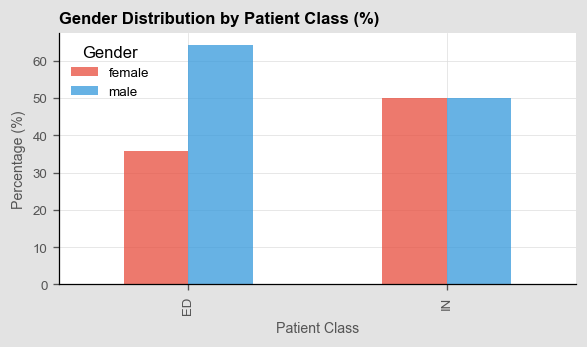

Gender distribution by patient class (%):
gender         female   male
patient_class               
ED              35.80  64.20
IN              50.03  49.97


In [49]:
# Gender distribution by patient class (percentages)
fig, ax = plt.subplots(figsize=(5, 3))

# Calculate percentage distribution
gender_counts = df.groupby(['patient_class', 'gender']).size().unstack()
gender_pct = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
gender_pct.plot(kind='bar', ax=ax, alpha=0.75)

ax.set_xlabel('Patient Class')
ax.set_ylabel('Percentage (%)')
ax.set_title('Gender Distribution by Patient Class (%)')
ax.legend(title='Gender')
plt.tight_layout()
plt.show()

# Summary statistics
print("Gender distribution by patient class (%):")
print(gender_pct.round(2))

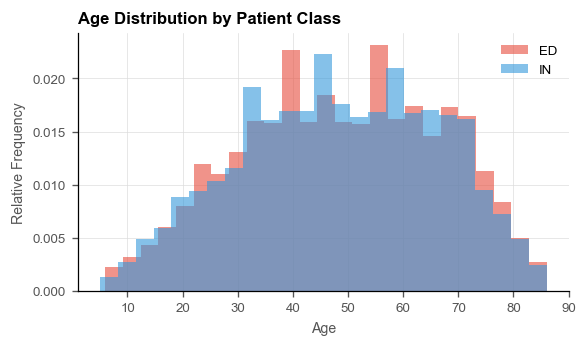

Age statistics by patient class:
                 count       mean        std  min   25%   50%   75%   max
patient_class                                                            
ED              5528.0  48.678546  17.952129  6.0  35.0  49.0  63.0  86.0
IN             14472.0  48.400498  17.856697  5.0  35.0  49.0  63.0  86.0


In [7]:
# Age distribution by patient class
fig, ax = plt.subplots(figsize=(5, 3))

for patient_class in df['patient_class'].unique():
    data = df[df['patient_class'] == patient_class]['age']
    ax.hist(data, alpha=0.6, label=patient_class, bins=25, density=True)

ax.set_xlabel('Age')
ax.set_ylabel('Relative Frequency')
ax.set_title('Age Distribution by Patient Class')
ax.legend()
plt.tight_layout()
plt.show()

# Summary statistics
print("Age statistics by patient class:")
print(df.groupby('patient_class')['age'].describe())

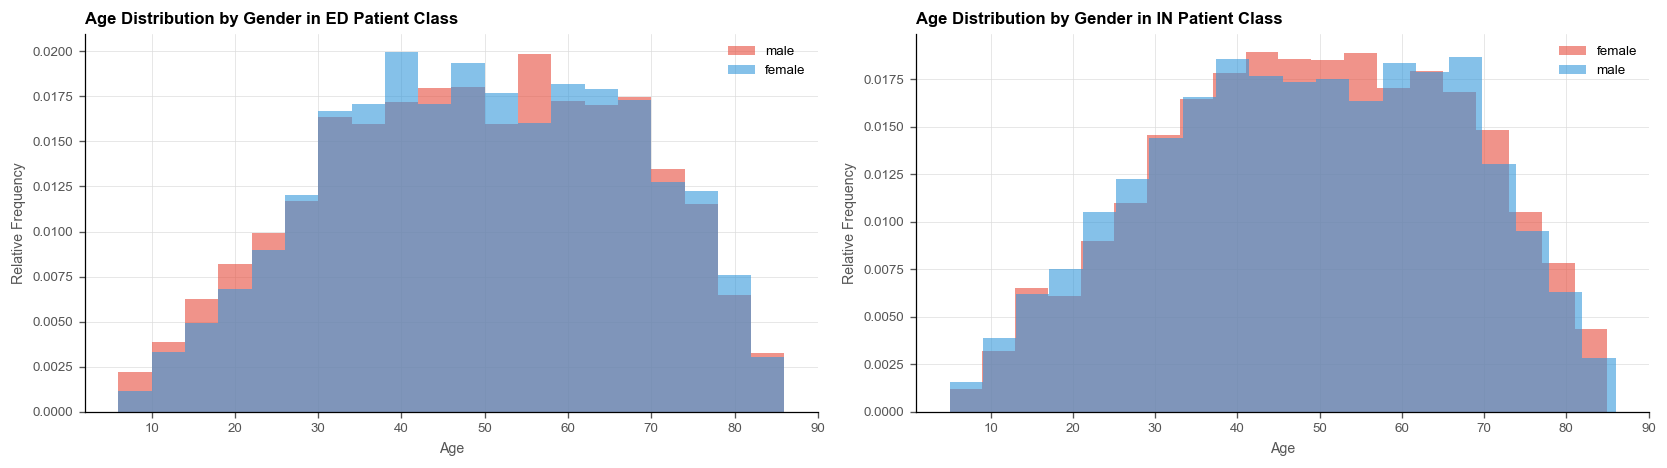

Age statistics by gender in ED patient class:
         count       mean        std  min   25%   50%   75%   max
gender                                                           
female  1979.0  49.081860  17.631648  6.0  36.0  49.0  63.0  86.0
male    3549.0  48.453649  18.126945  6.0  35.0  49.0  63.0  86.0

Age statistics by gender in IN patient class:
         count       mean        std  min   25%   50%   75%   max
gender                                                           
female  7241.0  48.454495  17.823193  5.0  35.0  49.0  63.0  85.0
male    7231.0  48.346425  17.891254  5.0  35.0  49.0  63.0  86.0


In [8]:
# Age distribution by gender in ED and IN patient classes
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ED Patient Class
ed_df = df[df['patient_class'] == 'ED']
ax = axes[0]

for gender in ed_df['gender'].unique():
    data = ed_df[ed_df['gender'] == gender]['age']
    ax.hist(data, alpha=0.6, label=gender, bins=20, density=True)

ax.set_xlabel('Age')
ax.set_ylabel('Relative Frequency')
ax.set_title('Age Distribution by Gender in ED Patient Class')
ax.legend()

# IN Patient Class
in_df = df[df['patient_class'] == 'IN']
ax = axes[1]

for gender in in_df['gender'].unique():
    data = in_df[in_df['gender'] == gender]['age']
    ax.hist(data, alpha=0.6, label=gender, bins=20, density=True)

ax.set_xlabel('Age')
ax.set_ylabel('Relative Frequency')
ax.set_title('Age Distribution by Gender in IN Patient Class')
ax.legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("Age statistics by gender in ED patient class:")
print(ed_df.groupby('gender')['age'].describe())

print("\nAge statistics by gender in IN patient class:")
print(in_df.groupby('gender')['age'].describe())


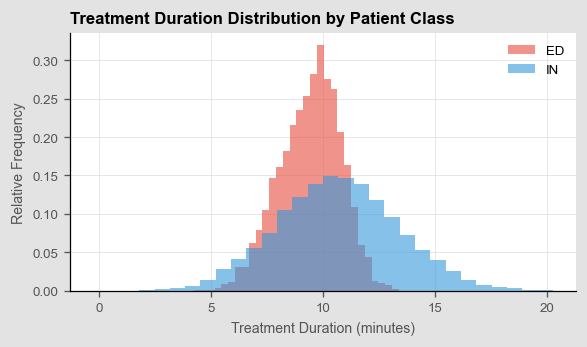

Treatment duration statistics by patient class:
                 count       mean       std       min       25%        50%  \
patient_class                                                                
ED              5528.0   9.423939  1.349725  4.240683  8.506854   9.558525   
IN             14472.0  10.659793  2.675653 -0.270533  8.846896  10.631100   

                     75%        max  
patient_class                        
ED             10.394158  13.383817  
IN             12.450754  20.273883  


In [27]:
# Treatment duration (scan_timestamp to report_sign_time) distribution by patient class
# Calculate duration in minutes
df['treatment_duration'] = (pd.to_datetime(df['radiologist_sign_time']) - pd.to_datetime(df['scan_timestamp'])).dt.total_seconds() / 60

fig, ax = plt.subplots(figsize=(5, 3))

for patient_class in df['patient_class'].unique():
    data = df[df['patient_class'] == patient_class]['treatment_duration'].dropna()
    ax.hist(data, alpha=0.6, label=patient_class, bins=30, density=True)

ax.set_xlabel('Treatment Duration (minutes)')
ax.set_ylabel('Relative Frequency')
ax.set_title('Treatment Duration Distribution by Patient Class')
ax.legend()
plt.tight_layout()
plt.show()

# Summary statistics
print("Treatment duration statistics by patient class:")
print(df.groupby('patient_class')['treatment_duration'].describe())

### Takeaways


**Patient Volume & Demographics:**
- IN patients are roughly 3 times more than ED patients (~15K to ~5K respectively)
- ED patients are approximately 67% male and 33% female, while IN is roughly 50/50
- Age distribution is similar in both patient classes, with median around 50 years

**Treatment Duration:**
- ED treatment duration is shorter than IN on average.
- ED distribution shows a narrow peak with less variability.
- IN distribution shows a broader spread with a longer tail extending to 20+ minutes.

## Sites

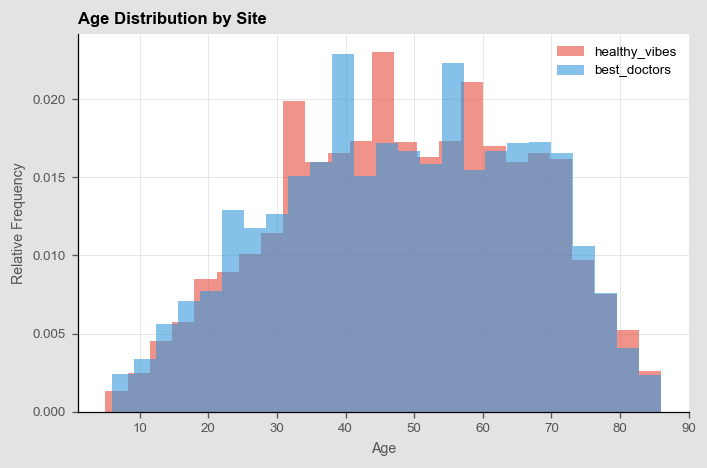

Age statistics by site:
                 count       mean        std  min   25%   50%   75%   max
site                                                                     
best_doctors    5986.0  48.139325  18.106608  6.0  34.0  49.0  63.0  86.0
healthy_vibes  14014.0  48.621735  17.785479  5.0  35.0  49.0  63.0  86.0


In [33]:
# Age distribution by site
fig, ax = plt.subplots(figsize=(6, 4))

for site in df['site'].unique():
    data = df[df['site'] == site]['age'].dropna()
    ax.hist(data, alpha=0.6, label=site, bins=25, density=True)

ax.set_xlabel('Age')
ax.set_ylabel('Relative Frequency')
ax.set_title('Age Distribution by Site')
ax.legend()
plt.tight_layout()
plt.show()

# Summary statistics
print("Age statistics by site:")
print(df.groupby('site')['age'].describe())

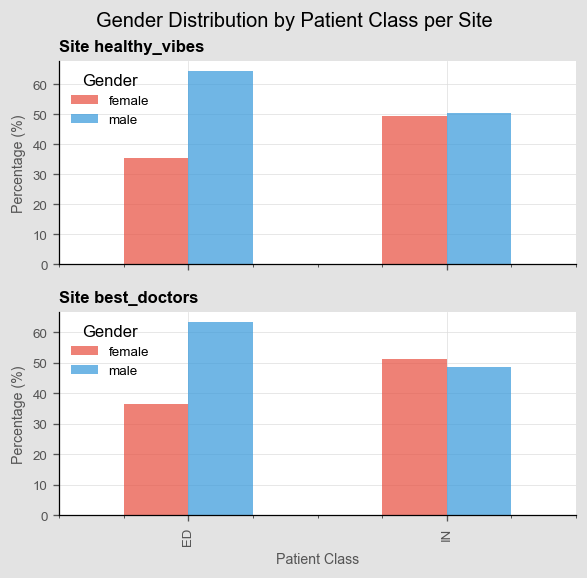

Gender distribution by patient class per site (%):

healthy_vibes:
gender         female   male
patient_class               
ED              35.50  64.50
IN              49.53  50.47

best_doctors:
gender         female   male
patient_class               
ED              36.51  63.49
IN              51.21  48.79


In [32]:
# Gender distribution by patient class per site
# fig, axes = plt.subplots(1, len(df['site'].unique()), figsize=(14, 5))

fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
fig.suptitle('Gender Distribution by Patient Class per Site', y=0.955)

for idx, site in enumerate(df['site'].unique()):
    ax = axes[idx] if len(df['site'].unique()) > 1 else axes
    site_df = df[df['site'] == site]
    
    gender_counts = site_df.groupby(['patient_class', 'gender']).size().unstack()
    gender_pct = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
    gender_pct.plot(kind='bar', ax=ax, alpha=0.7)
    
    ax.set_xlabel('Patient Class')
    ax.set_ylabel('Percentage (%)')
    ax.set_title(f'Site {site}')
    ax.legend(title='Gender')

plt.tight_layout()
plt.show()

# Summary statistics
print("Gender distribution by patient class per site (%):")
for site in df['site'].unique():
    site_df = df[df['site'] == site]
    gender_counts = site_df.groupby(['patient_class', 'gender']).size().unstack()
    gender_pct = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
    print(f"\n{site}:")
    print(gender_pct.round(2))

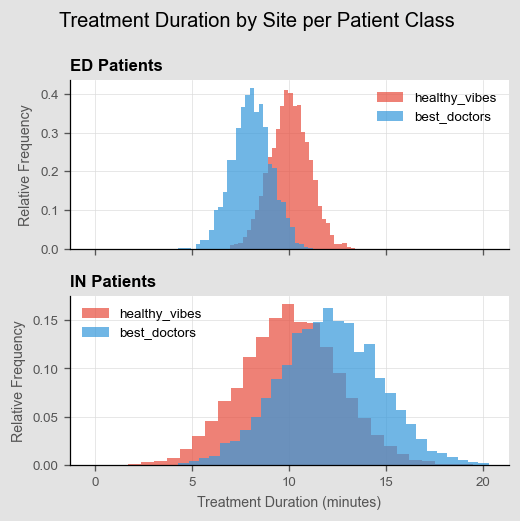

Treatment duration statistics by site and patient class:
                               count       mean       std       min  \
patient_class site                                                    
ED            best_doctors    1649.0   8.042458  1.010464  4.240683   
              healthy_vibes   3879.0  10.011220  1.002989  6.947483   
IN            best_doctors    4337.0  12.071871  2.535528  4.278450   
              healthy_vibes  10135.0  10.055531  2.500749 -0.270533   

                                   25%        50%        75%        max  
patient_class site                                                       
ED            best_doctors    7.379817   8.049933   8.729117  11.215883  
              healthy_vibes   9.346158  10.012333  10.691133  13.383817  
IN            best_doctors   10.354683  12.056067  13.835167  20.273883  
              healthy_vibes   8.369708  10.050683  11.734025  19.483917  


In [26]:
# Treatment duration by site per patient class
all_durations = df['treatment_duration'].dropna()
xmin, xmax = all_durations.min(), all_durations.max()
xpad = (xmax - xmin) * 0.05 if xmax > xmin else 1

fig, axes = plt.subplots(2, 1, figsize=(4.5, 4.5), sharex=True)
fig.suptitle('Treatment Duration by Site per Patient Class', y=0.955)

for idx, patient_class in enumerate(df['patient_class'].unique()):
    ax = axes[idx]
    pc_df = df[df['patient_class'] == patient_class]
    
    for site in pc_df['site'].unique():
        data = pc_df[pc_df['site'] == site]['treatment_duration'].dropna()
        ax.hist(data, alpha=0.7, label=site, bins=30, density=True)
    
    ax.set_title(f'{patient_class} Patients')
    ax.set_xlim(xmin - xpad, xmax + xpad)
    ax.set_ylabel('Relative Frequency')
    ax.legend()

axes[-1].set_xlabel('Treatment Duration (minutes)')

plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

# Summary statistics
print("Treatment duration statistics by site and patient class:")
print(df.groupby(['patient_class', 'site'])['treatment_duration'].describe())

### Takeaways

- Age distribution is similar in both sites.
- Gender distiribution by patient class is similar in both sites.
- Treatment duration distribution differs considerably between the two sites:
  - **ED** patients in 'healthy_vibes' take on average **longer** to treat.
  - While **IN** patients in 'healthy_vibes' take on average **less** time to treat.
